In [1]:
!pip install scikit-learn==1.2.2 imbalanced-learn==0.10.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 8.2 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.13.0
    Uninstalling imbalanced-learn-0.13.0:
      Successfully uninstalled imbalanced-learn-0.13.0


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


# sklearn models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC 
from sklearn.neural_network import MLPClassifier

In [3]:
# Load the dataset
data_path="/kaggle/input/extrovert-vs-introvert-behavior-dataset/personality_dataset.csv"
if not os.path.exists(data_path):
    raise FileNotFoundError(f"Dataset not found at {data_path}. Please check the file path.")
data = pd.read_csv(data_path)

Exploratory Data Analysis

In [4]:
data.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [5]:
print("Dataset Shape:\n",data.shape)

Dataset Shape:
 (2900, 8)


In [6]:
data.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2837.000000,2838.000000,2834.000000,2823.000000,2835.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.479192,2.903827,2.247327,4.289693,2.926582
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.000000,3.000000,5.000000,3.000000
75%,8.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


In [7]:
print("Dataset Missing Values:")
data.isnull().sum()

Dataset Missing Values:


Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64

In [8]:
print("Dataset Info:")
data.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [9]:
# Define numeric, categorical and target columns
numeric_columns= ['Time_spent_Alone','Social_event_attendance','Going_outside','Friends_circle_size','Post_frequency']
categorical_columns=['Stage_fear','Drained_after_socializing']
target_column='Personality'

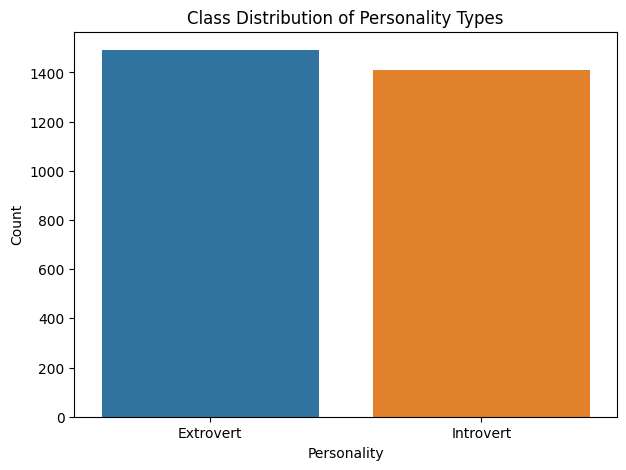

In [10]:
# Class Distribution
plt.figure(figsize=(7,5))
sns.countplot(x=target_column, data=data)
plt.xlabel('Personality')
plt.ylabel('Count')
plt.title("Class Distribution of Personality Types")
plt.show()

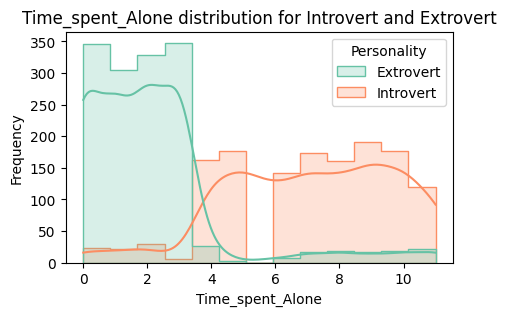

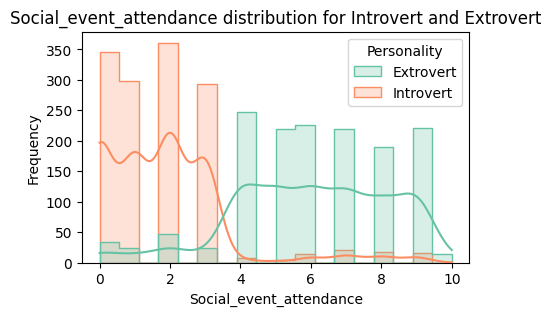

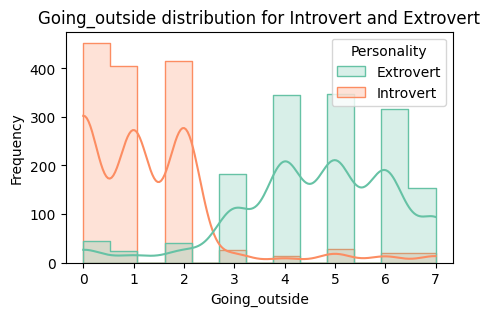

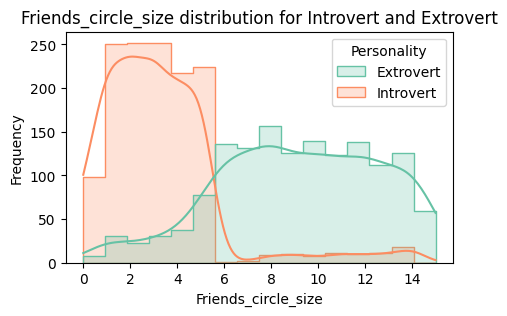

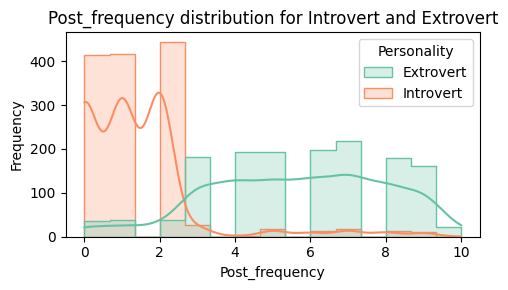

In [12]:
# Histplot of data
for col in numeric_columns:
    plt.figure(figsize=(5,3))
    sns.histplot(data, x= col, hue=target_column, kde=True, palette= 'Set2', element='step')
    plt.title(f"{col} distribution for Introvert and Extrovert")
    plt.xlabel(col)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

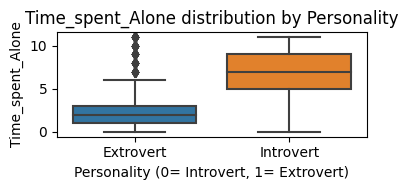

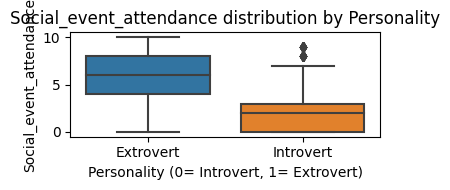

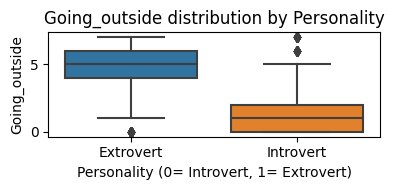

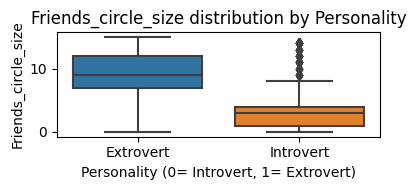

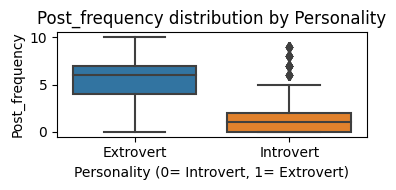

In [13]:
# Boxplot of data
for col in numeric_columns:
    plt.figure(figsize=(4,2))
    sns.boxplot(x= target_column, y=col, data=data)
    plt.title(f"{col} distribution by Personality")
    plt.xlabel('Personality (0= Introvert, 1= Extrovert)')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

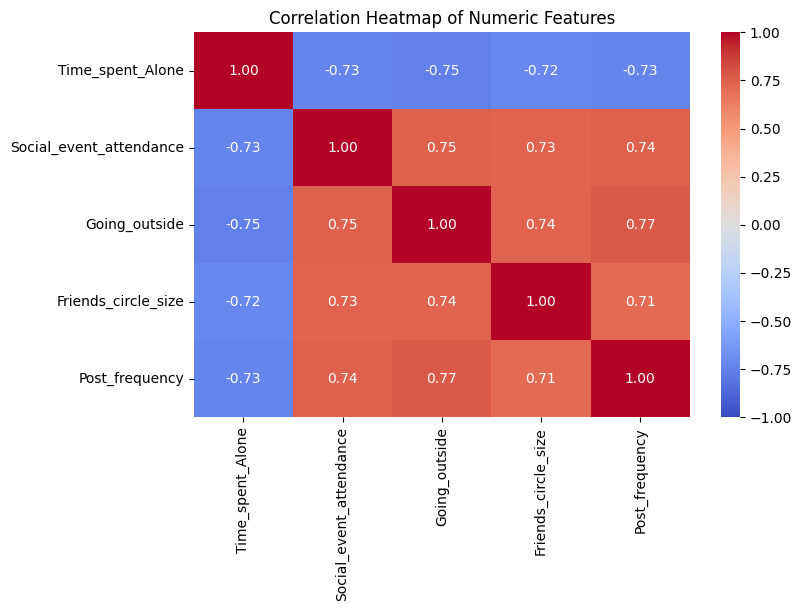

In [15]:
# Correlation heatmap
plt.figure(figsize=(8,5))
sns.heatmap(data[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

Data Preprocessing

In [16]:
# Filling the NaN
# For numeric columns
numeric_columns = ['Time_spent_Alone','Social_event_attendance','Going_outside',
                   'Friends_circle_size','Post_frequency']
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())

In [19]:
# for categorical columns
for col in categorical_columns:
    data[col].fillna(data[col].mode()[0],inplace=True)

In [20]:
data.isnull().sum()

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

In [21]:
le = LabelEncoder()
data[target_column] = le.fit_transform(data[target_column])
print(f"Encoded classes: {dict(zip(le.classes_, le.transform(le.classes_)))}")

# Encode categorical features
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Update feature list
encoded_columns = [col for col in data.columns if col != target_column]

# Capping outliers 
for col in numeric_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[col] = data[col].clip(lower=lower_bound, upper=upper_bound)

Encoded classes: {'Extrovert': 0, 'Introvert': 1}


In [23]:
# Count of each class
print(data['Personality'].value_counts())

# Percentage of each class
print(data['Personality'].value_counts(normalize=True)* 100)

Personality
0    1491
1    1409
Name: count, dtype: int64
Personality
0    51.413793
1    48.586207
Name: proportion, dtype: float64


In [25]:
# Train test split 
X= data.drop(columns=[target_column])
y=data[target_column]
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [51]:
# Save train and test data
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

# Save as CSV files
train_data.to_csv("train_data.csv", index=False)
test_data.to_csv("test_data.csv", index=False)

Model Training

In [26]:
# Model training 
models={
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'Support Vector Classifier': SVC(),
    'MLP Classifier': MLPClassifier(max_iter=500)
}

In [45]:
# Empty Dict to save models
os.makedirs("saved_models", exist_ok=True)

Model Evaluation

Logistic Regression Accuracy: 0.9069
Precision: 0.9073
Recall: 0.9069
F1 Score: 0.9069


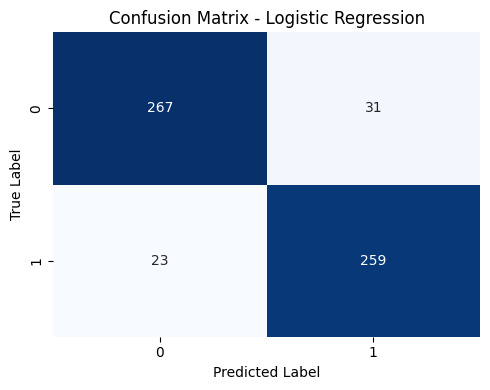

Saved: saved_models/logistic_regression.pkl
KNN Accuracy: 0.9138
Precision: 0.9152
Recall: 0.9138
F1 Score: 0.9138


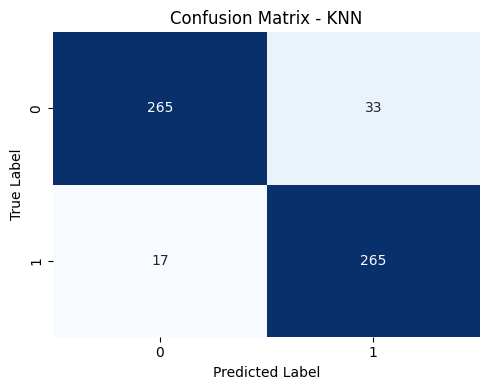

Saved: saved_models/knn.pkl
Decision Tree Classifier Accuracy: 0.8603
Precision: 0.861
Recall: 0.8603
F1 Score: 0.8604


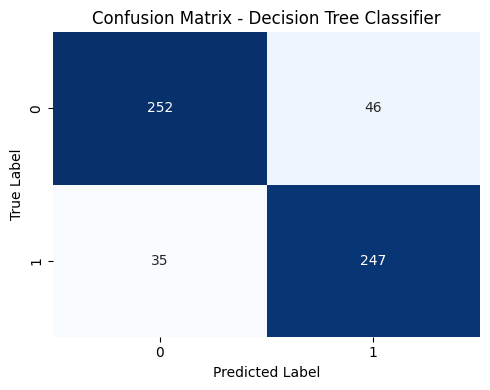

Saved: saved_models/decision_tree_classifier.pkl
Random Forest Classifier Accuracy: 0.8983
Precision: 0.8983
Recall: 0.8983
F1 Score: 0.8983


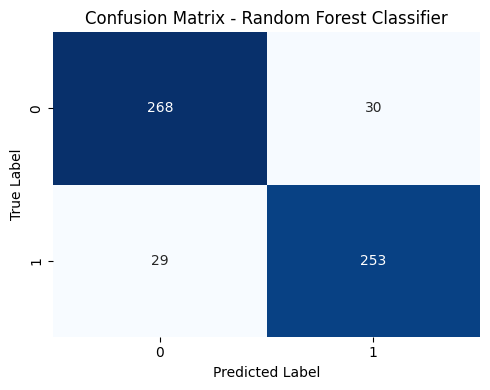

Saved: saved_models/random_forest_classifier.pkl
Gradient Boosting Classifier Accuracy: 0.9172
Precision: 0.9183
Recall: 0.9172
F1 Score: 0.9172


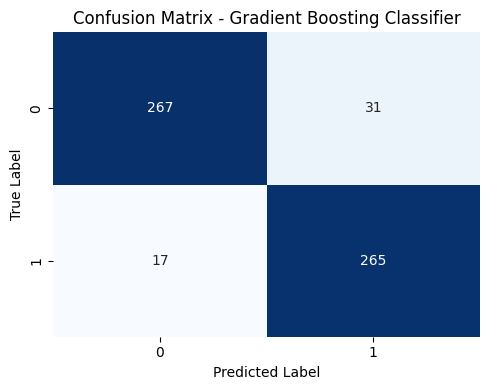

Saved: saved_models/gradient_boosting_classifier.pkl
Support Vector Classifier Accuracy: 0.9172
Precision: 0.9183
Recall: 0.9172
F1 Score: 0.9172


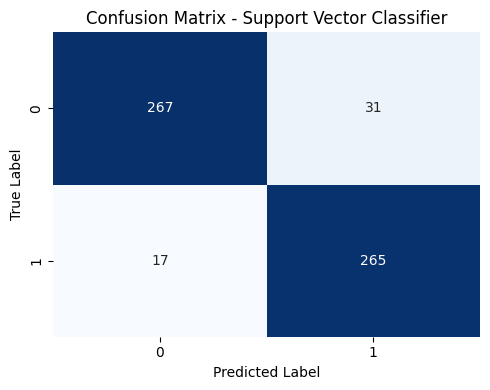

Saved: saved_models/support_vector_classifier.pkl
MLP Classifier Accuracy: 0.9172
Precision: 0.9183
Recall: 0.9172
F1 Score: 0.9172


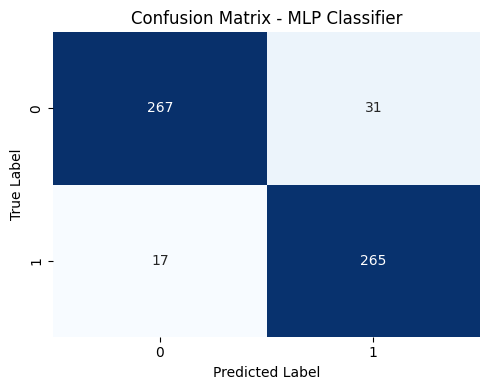

Saved: saved_models/mlp_classifier.pkl


In [50]:
for name, model in models.items():
    pipeline= make_pipeline(StandardScaler(), model)
    pipeline.fit(X_train, y_train)
    y_pred= pipeline.predict(X_test)
    
    # Calculate the Accuracy, Precision, Recall, F1 Score 
    acc= accuracy_score(y_test, y_pred)
    precision= precision_score(y_test, y_pred, average="weighted", zero_division=0)
    recall= recall_score(y_test, y_pred, average="weighted")
    f1= f1_score(y_test, y_pred, average="weighted")

    print(f"{name} Accuracy: {acc:.4}")
    print(f"Precision: {precision:.4}")
    print(f"Recall: {recall:.4}")
    print(f"F1 Score: {f1:.4}")
    
    # Visualize Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()
    
    # Save the Model
    filename= f"saved_models/{name.replace(' ', '_').lower()}.pkl"
    joblib.dump(pipeline, filename)
    print(f"Saved: {filename}")


Model Classification Report

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Empty list to store results
results = []

for name, model in models.items():
    pipeline = make_pipeline(StandardScaler(), model)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted", zero_division=0)
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")

    # Append results
    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })

In [54]:
# Convert to DataFrame
results_data = pd.DataFrame(results)

# Sort by F1 Score
results_data.sort_values(by="F1 Score", ascending=False, inplace=True)

# Display
print("Classification Report:")
print(results_data)

Classification Report:
                          Model  Accuracy  Precision    Recall  F1 Score
4  Gradient Boosting Classifier  0.917241   0.918324  0.917241  0.917248
5     Support Vector Classifier  0.917241   0.918324  0.917241  0.917248
6                MLP Classifier  0.915517   0.916750  0.915517  0.915521
1                           KNN  0.913793   0.915185  0.913793  0.913793
0           Logistic Regression  0.906897   0.907277  0.906897  0.906914
3      Random Forest Classifier  0.903448   0.903562  0.903448  0.903462
2      Decision Tree Classifier  0.853448   0.853752  0.853448  0.853476
